In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

file_path = 'types.csv'
types_df = pd.read_csv(file_path)


In [2]:
# Общая информация о датасете

print(f"Размер датасета: {types_df.shape}")
print("\nПервые 5 строк:")
display(types_df.head())



Размер датасета: (32304, 10)

Первые 5 строк:


,ID заказа,Дата заказа,Тип клиента,Категория груза,Вес груза (кг),Объём груза (м³),Требуемое время доставки (дней),Расстояние до клиента (км),Особые условия,Приоритет доставки
0,OC94021,2019-01-01,Корпоративный,Продукты питания,1599.34,7.11,5.35,421.84,Требуется аккуратность,Средний
1,OC49150,2019-01-01,Корпоративный,Стройматериалы,2453.17,10.85,9.26,761.39,Нет,Низкий
2,OC57082,2019-01-01,Корпоративный,Медикаменты,406.11,2.11,1.00,62.74,Требуется холод,Высокий
3,OC96508,2019-01-01,Корпоративный,Техника,1548.39,6.53,2.24,255.02,Нет,Средний
4,OR78525,2019-01-01,Корпоративный,Медикаменты,297.43,1.34,1.00,12.98,Требуется холод,Высокий


In [3]:
print("\nИнформация о типах данных и непустых значениях:")
types_df.info()



Информация о типах данных и непустых значениях:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32304 entries, 0 to 32303
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID заказа                        30463 non-null  object 
 1   Дата заказа                      30432 non-null  object 
 2   Тип клиента                      32304 non-null  object 
 3   Категория груза                  32304 non-null  object 
 4   Вес груза (кг)                   30741 non-null  float64
 5   Объём груза (м³)                 30607 non-null  float64
 6   Требуемое время доставки (дней)  30794 non-null  float64
 7   Расстояние до клиента (км)       30362 non-null  float64
 8   Особые условия                   30845 non-null  object 
 9   Приоритет доставки               30540 non-null  object 
dtypes: float64(4), object(6)
memory usage: 2.5+ MB


In [4]:
# Описательная статистика для числовых признаков
display(types_df.describe().round(0))

,Вес груза (кг),Объём груза (м³),Требуемое время доставки (дней),Расстояние до клиента (км)
count,30741.0,30607.0,30794.0,30362.0
mean,1515.0,8.0,4.0,344.0
std,2412.0,12.0,5.0,370.0
min,0.0,0.0,0.0,0.0
25%,481.0,2.0,1.0,95.0
50%,788.0,4.0,2.0,203.0
75%,2197.0,10.0,6.0,600.0
max,37894.0,198.0,47.0,2516.0


In [5]:
# Описательная статистика для строковых признаков
display(types_df.select_dtypes(include=['object', 'category']).describe())


,ID заказа,Дата заказа,Тип клиента,Категория груза,Особые условия,Приоритет доставки
count,30463,30432,32304,32304,30845,30540
unique,28816,2192,2,5,3,3
top,OC28442,2024-11-04,Корпоративный,Продукты питания,Требуется холод,Высокий
freq,4,30,17158,7273,14276,16931


In [6]:
# Пустые данные
missing_counts = types_df.isnull().sum()
missing_percent = (missing_counts / len(types_df)) * 100
missing_data = pd.DataFrame({'Количество пропусков': missing_counts, 'Процент пропусков': missing_percent})
display(missing_data)

,Количество пропусков,Процент пропусков
ID заказа,1841,5.698985
Дата заказа,1872,5.794948
Тип клиента,0,0.000000
Категория груза,0,0.000000
Вес груза (кг),1563,4.838410
Объём груза (м³),1697,5.253219
Требуемое время доставки (дней),1510,4.674344
Расстояние до клиента (км),1942,6.011639
Особые условия,1459,4.516469
Приоритет доставки,1764,5.460624


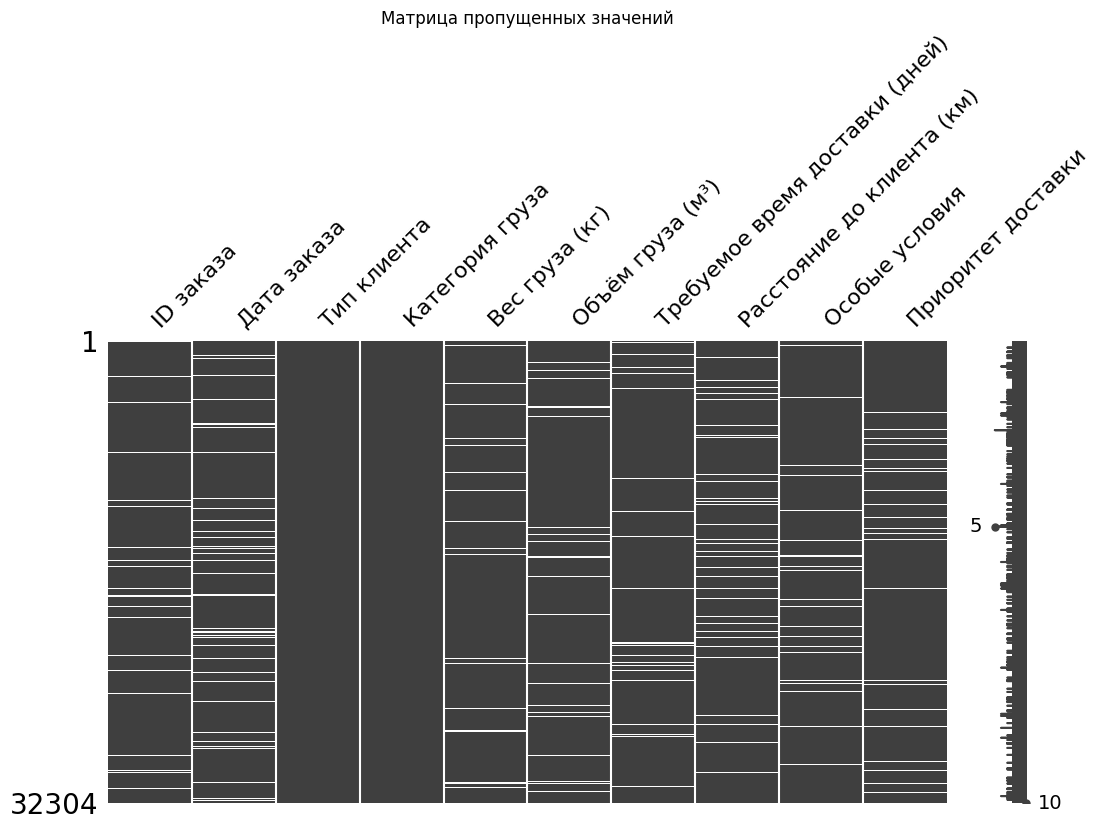

In [7]:
# Визуализация пропусков
msno.matrix(types_df, figsize=(12,6))
plt.title('Матрица пропущенных значений')
plt.show()

In [8]:
# Проверка на дубликаты

duplicate_count = types_df.duplicated().sum()
print(f"Количество дублированных строк: {duplicate_count}")

Количество дублированных строк: 0


In [9]:
# Уникальные значения
print("\nUnique Values per Column")
for col in types_df.columns:
    print(f"{col}: {types_df[col].nunique()} unique values")


Unique Values per Column
ID заказа: 28816 unique values
Дата заказа: 2192 unique values
Тип клиента: 2 unique values
Категория груза: 5 unique values
Вес груза (кг): 28359 unique values
Объём груза (м³): 2526 unique values
Требуемое время доставки (дней): 2179 unique values
Расстояние до клиента (км): 23997 unique values
Особые условия: 3 unique values
Приоритет доставки: 3 unique values


In [10]:
# Разделение признаков на числовые и строковые

numeric_cols = types_df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = types_df.select_dtypes(include=['object']).columns.tolist()

print("Числовые признаки:", numeric_cols)
print("Строковые признаки:", categorical_cols)


Числовые признаки: ['Вес груза (кг)', 'Объём груза (м³)', 'Требуемое время доставки (дней)', 'Расстояние до клиента (км)']
Строковые признаки: ['ID заказа', 'Дата заказа', 'Тип клиента', 'Категория груза', 'Особые условия', 'Приоритет доставки']



=== Распределение числовых признаков ===


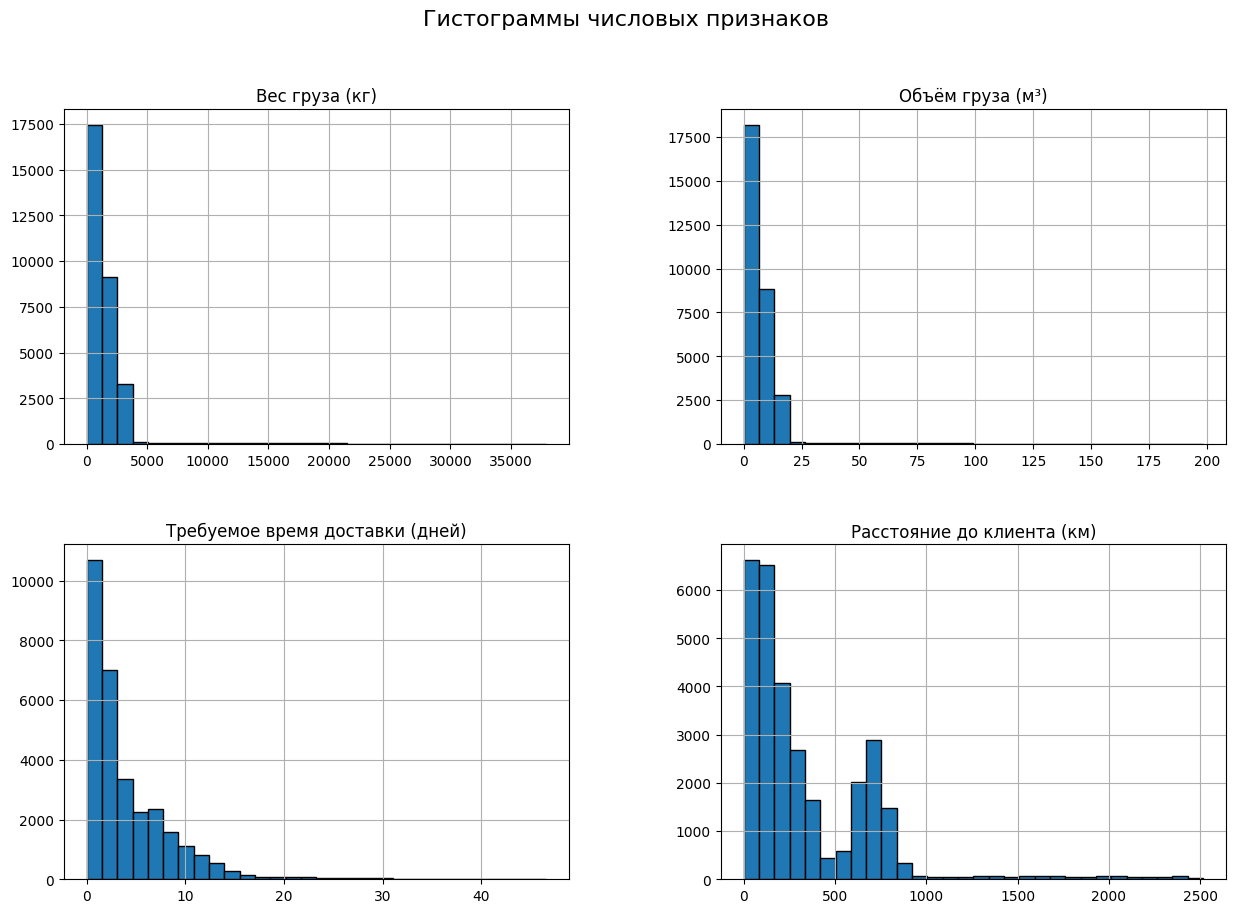

In [11]:

# Унивариантный анализ признаков

# Гистограммы для числовых признаков
if numeric_cols:
    print("\n=== Распределение числовых признаков ===")
    types_df[numeric_cols].hist(bins=30, figsize=(15,10), edgecolor='black')
    plt.suptitle('Гистограммы числовых признаков', fontsize=16)
    plt.show()

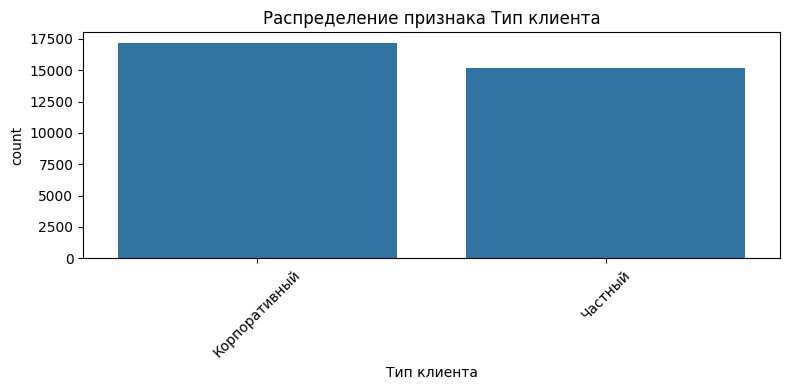

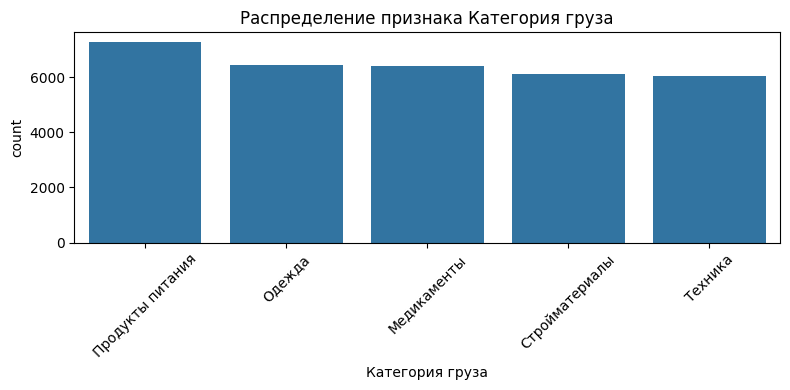

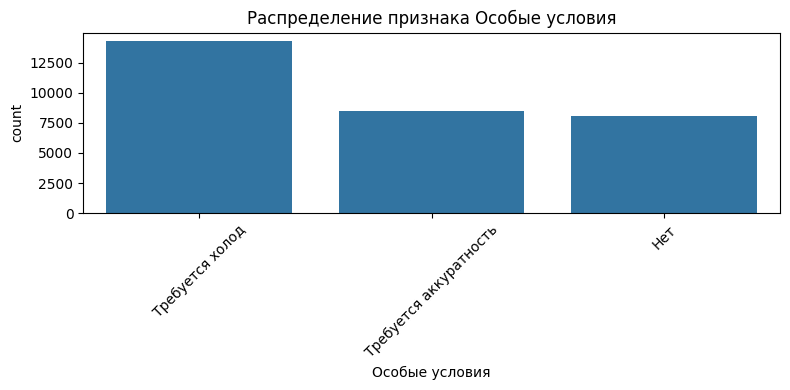

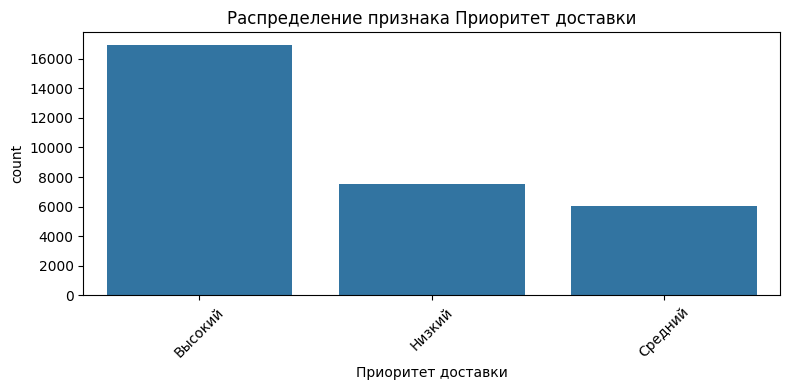

In [12]:
# Анализ строковых признаков
string_cols_to_analyze = []

for col in categorical_cols:
    if not any(keyword in col.lower() for keyword in ['id', 'дата', 'date']):
        string_cols_to_analyze.append(col)

if string_cols_to_analyze:

    for col in string_cols_to_analyze:
        plt.figure(figsize=(8,4))
        sns.countplot(data=types_df, x=col, order=types_df[col].value_counts().index)
        plt.title(f'Распределение признака {col}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
else:
    print("\nСтроковые признаки для анализа отсутствуют.")


=== Корреляционная матрица числовых признаков ===


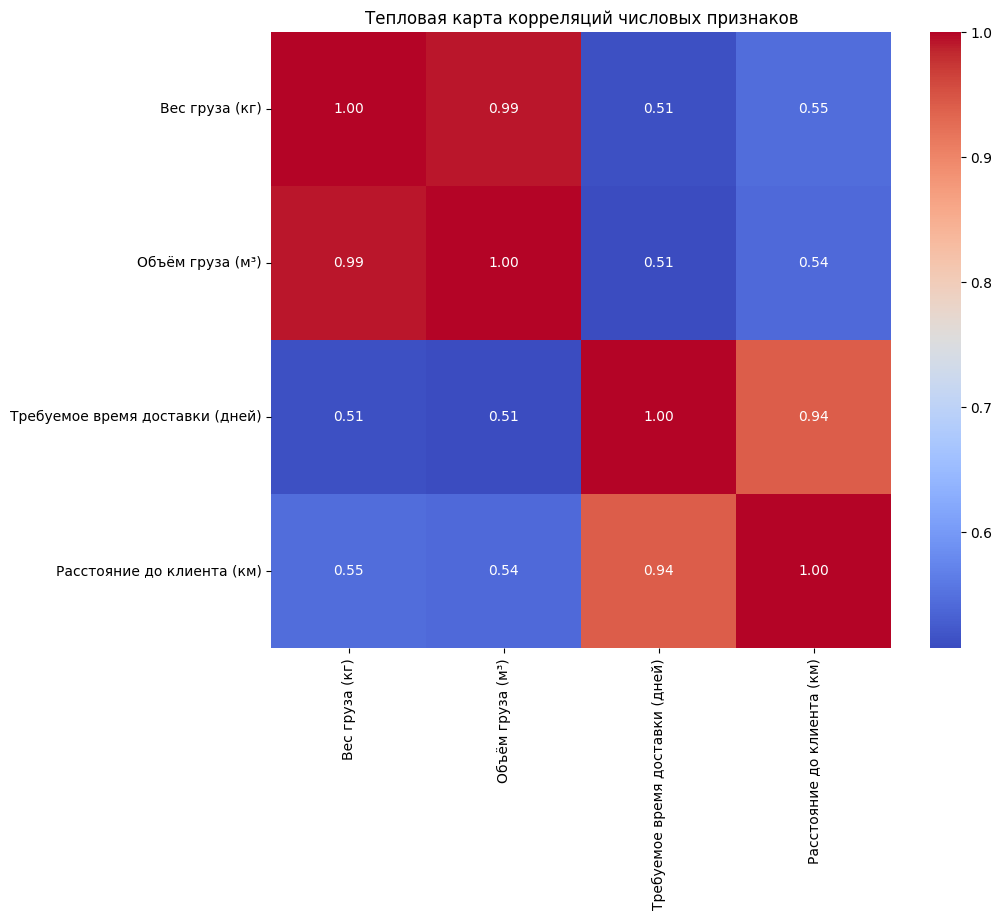

In [13]:
# Биварантный анализ

# Корреляционная матрица числовых признаков
if len(numeric_cols) > 1:
    print("\n=== Корреляционная матрица числовых признаков ===")
    plt.figure(figsize=(10,8))
    sns.heatmap(types_df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Тепловая карта корреляций числовых признаков')
    plt.show()

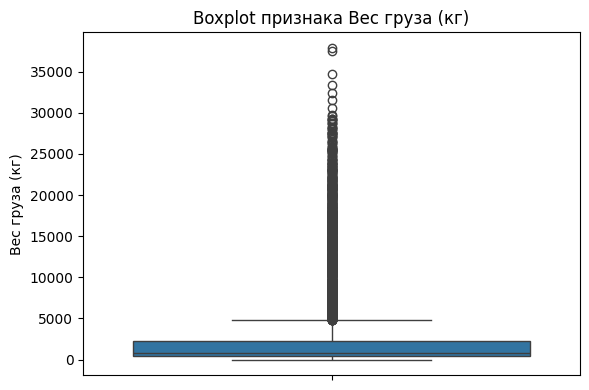

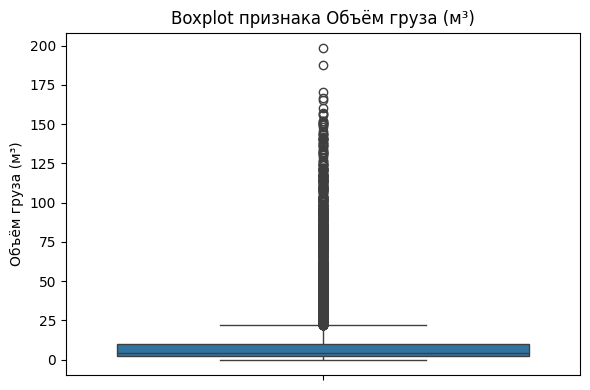

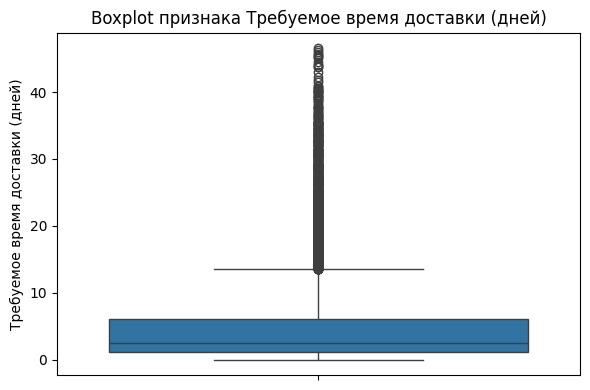

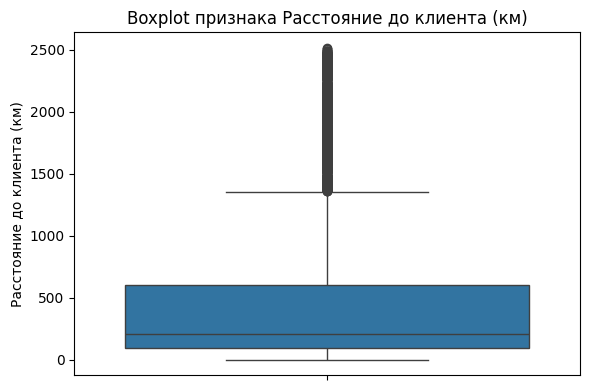

In [14]:
# Аномалии

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=types_df, y=col)
    plt.title(f'Boxplot признака {col}')
    plt.tight_layout()
    plt.show()

In [15]:
# 11. Проверка распределения строковых признаков
for col in string_cols_to_analyze:
    counts = types_df[col].value_counts()
    total = counts.sum()
    print(f"\nРаспределение признака {col}:")
    for value, count in counts.items():
        percentage = (count / total) * 100
        print(f"- {value}: {count} записей ({percentage:.2f}%)")


Распределение признака Тип клиента:
- Корпоративный: 17158 записей (53.11%)
- Частный: 15146 записей (46.89%)

Распределение признака Категория груза:
- Продукты питания: 7273 записей (22.51%)
- Одежда: 6466 записей (20.02%)
- Медикаменты: 6405 записей (19.83%)
- Стройматериалы: 6121 записей (18.95%)
- Техника: 6039 записей (18.69%)

Распределение признака Особые условия:
- Требуется холод: 14276 записей (46.28%)
- Требуется аккуратность: 8469 записей (27.46%)
- Нет: 8100 записей (26.26%)

Распределение признака Приоритет доставки:
- Высокий: 16931 записей (55.44%)
- Низкий: 7538 записей (24.68%)
- Средний: 6071 записей (19.88%)


In [16]:
# 13. Итоговые выводы по EDA
print("\n=== Итоговые наблюдения ===")
print(f"- Размер датасета: {types_df.shape}")
print(f"- Найдено {duplicate_count} дубликатов.")
print("- Пропуски обнаружены по следующим признакам:")
display(missing_data[missing_data['Количество пропусков'] > 0])

if numeric_cols:
    print(f"- Числовые признаки: {numeric_cols}")
else:
    print("- Числовые признаки отсутствуют.")

if string_cols_to_analyze:
    print(f"- Строковые признаки для анализа: {string_cols_to_analyze}")
else:
    print("- Строковые признаки для анализа отсутствуют.")


=== Итоговые наблюдения ===
- Размер датасета: (32304, 10)
- Найдено 0 дубликатов.
- Пропуски обнаружены по следующим признакам:


,Количество пропусков,Процент пропусков
ID заказа,1841,5.698985
Дата заказа,1872,5.794948
Вес груза (кг),1563,4.838410
Объём груза (м³),1697,5.253219
Требуемое время доставки (дней),1510,4.674344
Расстояние до клиента (км),1942,6.011639
Особые условия,1459,4.516469
Приоритет доставки,1764,5.460624


- Числовые признаки: ['Вес груза (кг)', 'Объём груза (м³)', 'Требуемое время доставки (дней)', 'Расстояние до клиента (км)']
- Строковые признаки для анализа: ['Тип клиента', 'Категория груза', 'Особые условия', 'Приоритет доставки']
